# Testing & Benchmarking

Tests must


        ● be in a file that ends with “_test.go”  
        ● put the file in the same package as the one being tested
        ● be in a func with a signature “func TestXxx(*testing.T)”
        
Run a test at bash


        ● > go test
        ● > go test -v (more info)
        ● > go test ./... (./ en donde estoy y ... todos los directores que estan por debajo)
        
No es necesario que name_test.go tenga el mismo nombre que name.go. Pero es una buena práctica.

- https://pkg.go.dev/testing#B.Error

## Error:

Retorna:

        PASS
        ok  	mycodes/13.Test	0.001s


In [1]:
package main

import "fmt"

func main() {
	fmt.Println("2 + 3 =", mySum(2, 3))
	fmt.Println("4 + 7 =", mySum(4, 7))
	fmt.Println("5 + 9 =", mySum(5, 9))
}

func mySum(xi ...int) int {
	sum := 0
	for _, v := range xi {
		sum += v
	}
	return sum
}
main()

2 + 3 = 5
4 + 7 = 11
5 + 9 = 14


In [5]:
package main

import(
    "testing"
)
func TestMySum (t *testing.T){
    x:=mySum(2,3)
    if x!=5{
            t.Error("Problemas! Esperado", 5, " obtenido: ", x)
    }
} 

## If it fails:
    === RUN   TestMySum
    main_test.go:9: Problemas! Esperado 5  obtenido:  6
    --- FAIL: TestMySum (0.00s)
    FAIL
    exit status 1
    FAIL	mycodes/13.Test	0.001s


## Table text
We can create:



In [6]:
package main

import(
    "testing"
)
func TestMySum (t *testing.T){       // It stars now with capital letter. The name is whatever, but this name is a good practice
    type test struct{
            data []int
            answer int
        }

    tests := []test{
            test{[]int{21,21},42},
            test{[]int{3,4,5},12},
            test{[]int{1,1},2},
            test{[]int{-1,0,1},0},
        }

    for _,v := range tests {
            x:=mySum(v.data...)
            if x != v.answer{
                t.Error("Problemas! Esperado:",v.answer, " obtenido: ",x)
            }
        }
} 

## Examples
An example is a wonderful way to document your code.

Allow a user to understand what this code does by seeing an example, the wonderful way to document the code, and then also to test your code, because those examples will run as tests.

- https://go.dev/blog/examples



In [7]:
package acdc

import(
    "fmt"
)
func ExampleSum(){
    fmt.Println(Sum(1,2,3))
    // Output:
        // 7
}

// No olvidar los : despues del output

ERROR: repl.go:7:14: undefined identifier: Sum

Example functions without output comments are compiled but not executed.


Para que aparezcan bonitos los ejemplos!!

        > godoc -http=:8080
     

The naming convention to declare examples for the package, a function F, a type T and method M on type T are:

        func Example() { ... }
        func ExampleF() { ... }
        func ExampleT() { ... }
        func ExampleT_M() { ... }


- https://pkg.go.dev/testing#hdr-Examples


## Golint

        ● gofmt
            ○ formats go code
        ● go vet
            ○ reports suspicious constructs
        ● golint
            ○ reports poor coding style
            
https://github.com/golang/lint

At terminal:

        > golint ./...

Cosas importantes para el trabajo:

- Como hacer la documentación
- Golint
- Revisar la version de go

## go1.20 (released 2023-02-01)
Go 1.20 is a major release of Go.


Mi version de go: <br>
1.13 <br>
https://go.dev/doc/devel/release#policy :

Se admite cada versión principal de Go hasta que haya dos versiones principales más recientes. Por ejemplo, Go 1.5 fue compatible hasta la versión Go 1.7 y Go 1.6 fue compatible hasta la versión Go 1.8. Solucionamos problemas críticos, incluidos problemas de seguridad críticos, en versiones compatibles según sea necesario mediante la publicación de revisiones menores (por ejemplo, Go 1.6.1, Go 1.6.2, etc.).



# Benchmark
Permite medir el rendimiento de su código.
Es posible escribir el codigo de varias maneras, pero, cual es la más rápida?


Part of the testing package allows us to measure the speed of our code. This could also be
called “measuring the performance” of your code, or “benchmarking” your code - finding out how
fast the code runs.


At teminal:

        > go test -bench .             (all bechmarks)
        > go test -bench Greet 
        
Output: 

    goos: linux
    goarch: amd64
    pkg: GO_Udemy_My_Codes/13.Test/Benchmark/Saying
    BenchmarkGreet-4(#núcleos)  8779282(#veces que se corre)  116 ns/op (tiempo que tomó)
    PASS
       
       

>go help testflag:

        -bench regexp
	    Run only those benchmarks matching a regular expression.
	    By default, no benchmarks are run.
	    To run all benchmarks, use '-bench .' or '-bench=.'.
	    The regular expression is split by unbracketed slash (/)
	    characters into a sequence of regular expressions, and each
	    part of a benchmark's identifier must match the corresponding
	    element in the sequence, if any. Possible parents of matches
	    are run with b.N=1 to identify sub-benchmarks. For example,
	    given -bench=X/Y, top-level benchmarks matching X are run
	    with b.N=1 to find any sub-benchmarks matching Y, which are
	    then run in full.


In [ ]:
// And the way benchmarking works is it's going to run this code 
// a lot of times until it gets a statistically
// accurate measurement of how long it took to run it.


func BenchmarkGreet(b *testing.B){
    for i :=0 ; i <b.N; i++{       //It'll determine how many times it runs.
        Greet("Jammes")
    } 
}

# Coverage
Coverage in programming is how much of the code that you've written is covered by tests.
The best practice is to cover as much as possible of you code with test.
    

Neverless, in practice,  that idea is impossible at 100%. At least 70 or 80% is the ideal.

There is a coverage analysis:


>go help testflag (only test has less info)

        -cover
                Enable coverage analysis.
                Note that because coverage works by annotating the source
                code before compilation, compilation and test failures with
                coverage enabled may report line numbers that don't correspond
                to the original sources.


>go test -cover

Output:

        PASS
        coverage: 100.0% of statements
        ok  	GO_Udemy_My_Codes/13.Test/Benchmark/Saying	0.002s


Porque todas mis funciones tienen test!

>go help testflag

    -coverprofile cover.out
	    Write a coverage profile to the file after all tests have passed.
	    Sets -cover.
> go test -coverprofile c.out

Esto me crea un archivo c.out. El cual puedo ver en html al dar:

> go tool cover -html=c.out

Y se obtiene un resumen de que funciones estan cubiertas y cuales no.

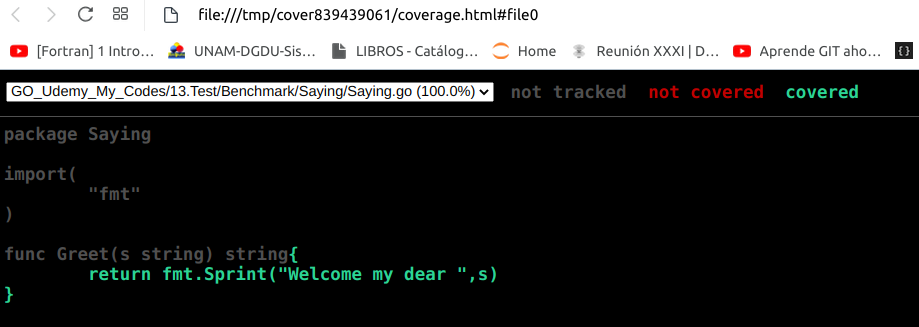

Recordar que para más info:
> go tool cover -help

## Benchmark examples

## Remember to BET
- benchmark
- Example
- Test


        BenchmarkCat(b *testing.B)
        ExampleCat()
        TestCat(t *testing.T)
        
And the commands are:

>godoc -http=:8080

> go test <br>
> go test -bench . <br>
> go test -cover  <br>
> go test -coverprofile c.out  <br>
> go tool cover -html=c.out  <br>